# Exploratory Data Analysis (EDA) - Bristol Airbnb Data

In [1]:
# Objective: To understand the characteristics, distributions, and relationships
# Within the Bristol Airbnb dataset. This analysis will inform feature
# engineering and modeling decisions.
# =============================================================================

# --- Setup and Data Loading ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the datasets
try:
    listings_df = pd.read_csv('listings.csv')
    calendar_df = pd.read_csv('calendar.csv')
    print('Datasets loaded successfully.')
except FileNotFoundError:
    print('Error: listings.csv and calendar.csv not found.')
    exit()

Datasets loaded successfully.


## DATA CLEANING & PREPARATION

In [2]:
# Before analysis, we'll perform some light cleaning on key columns.

# Cleaning the price column in listings_df
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
listings_df['host_is_superhost'] = np.where(listings_df['host_is_superhost'] == 't', 'Superhost', 'Regular Host')


# Preparing calendar_df for time-series analysis
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['is_booked'] = np.where(calendar_df['available'] == 'f', 1, 0)

## Univariate Analysis: Understanding Key Features


Analyzing Price Distribution...


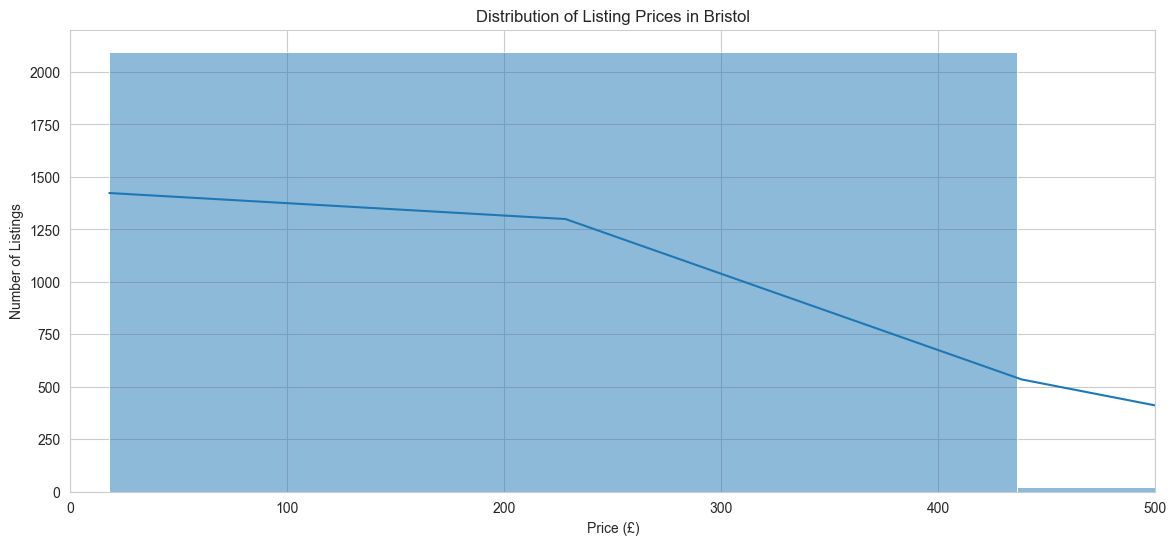

Summary statistics for Price:
count     2133.000000
mean       155.319737
std       1034.735497
min         18.000000
25%         59.000000
50%         90.000000
75%        131.000000
max      41854.000000
Name: price, dtype: float64

Analyzing Room Types...


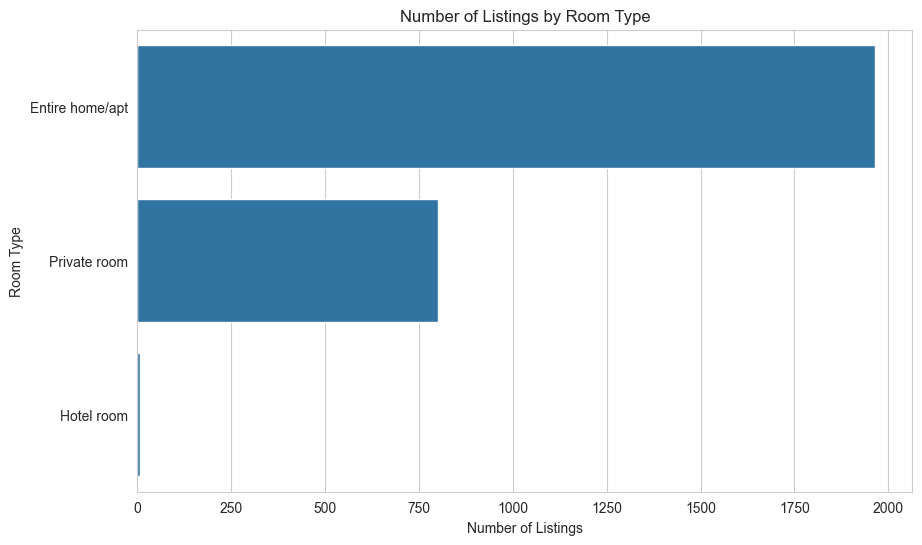


Analyzing Neighbourhoods...


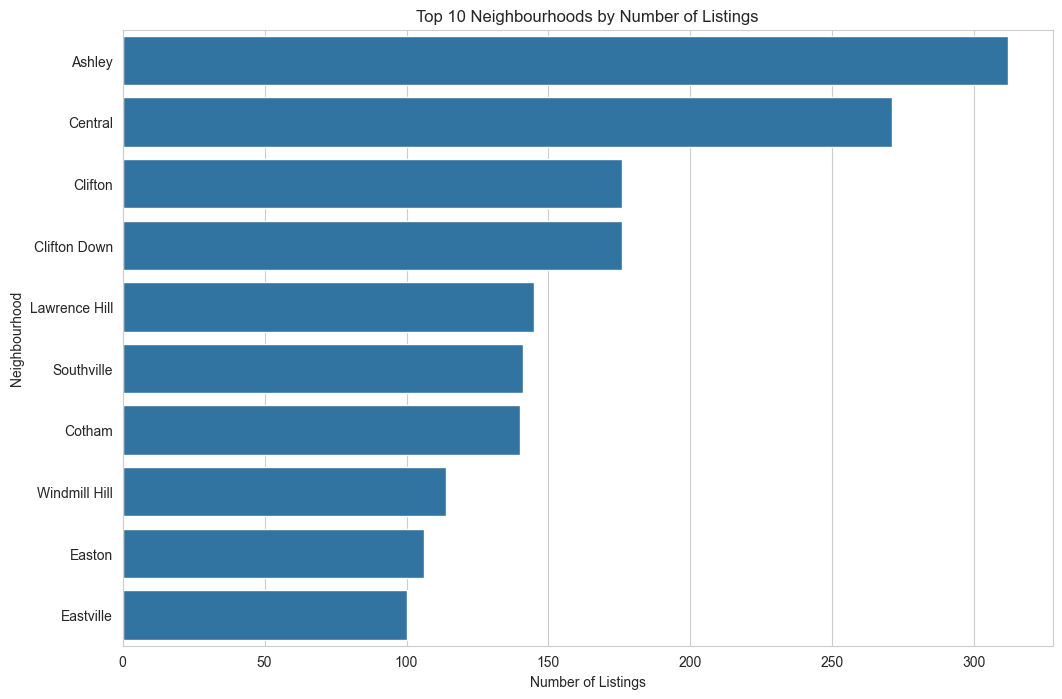

In [3]:
# --- Distribution of Price ---
print("\nAnalyzing Price Distribution...")
plt.figure(figsize=(14, 6))
sns.histplot(listings_df['price'], bins=100, kde=True)
plt.title('Distribution of Listing Prices in Bristol')
plt.xlabel('Price (£)')
plt.ylabel('Number of Listings')
plt.xlim(0, 500) # Limiting x-axis to see the main distribution
plt.show()
print("Summary statistics for Price:")
print(listings_df['price'].describe())

# --- Distribution of Room Types ---
print("\nAnalyzing Room Types...")
plt.figure(figsize=(10, 6))
sns.countplot(y=listings_df['room_type'], order=listings_df['room_type'].value_counts().index)
plt.title('Number of Listings by Room Type')
plt.xlabel('Number of Listings')
plt.ylabel('Room Type')
plt.show()

# --- Top 10 Neighbourhoods by Number of Listings ---
print("\nAnalyzing Neighbourhoods...")
plt.figure(figsize=(12, 8))
sns.countplot(y=listings_df['neighbourhood_cleansed'], order=listings_df['neighbourhood_cleansed'].value_counts().iloc[:10].index)
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.show()

## Bivariate and Multivariate Analysis for Dashboard


Analyzing Demand by Neighbourhood...


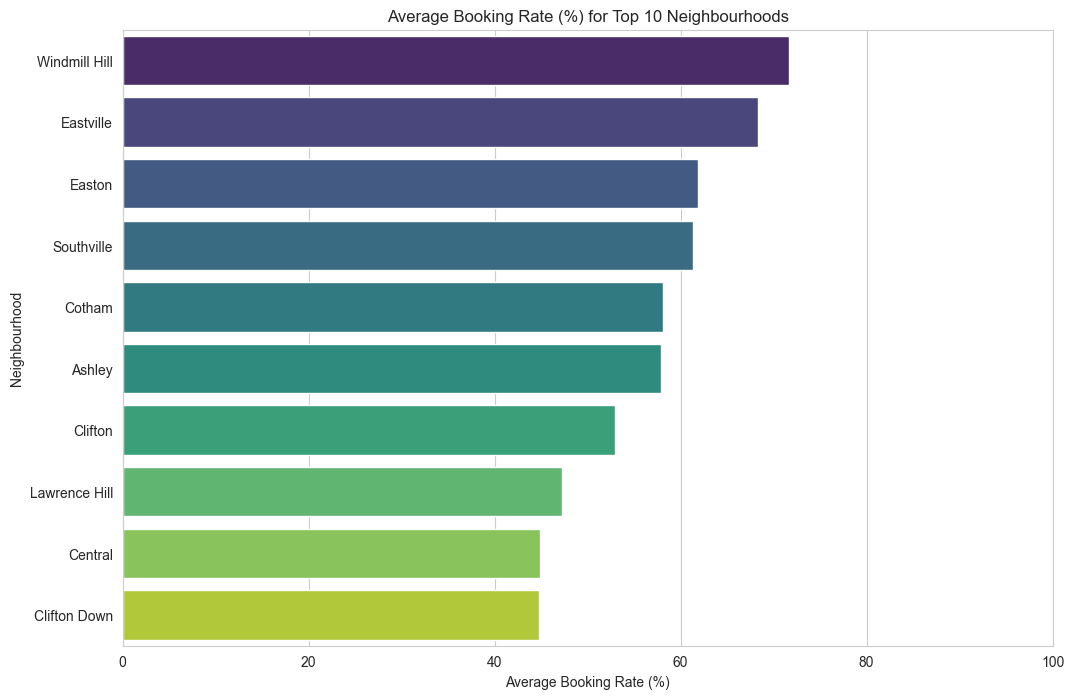


Analyzing Superhost Performance...


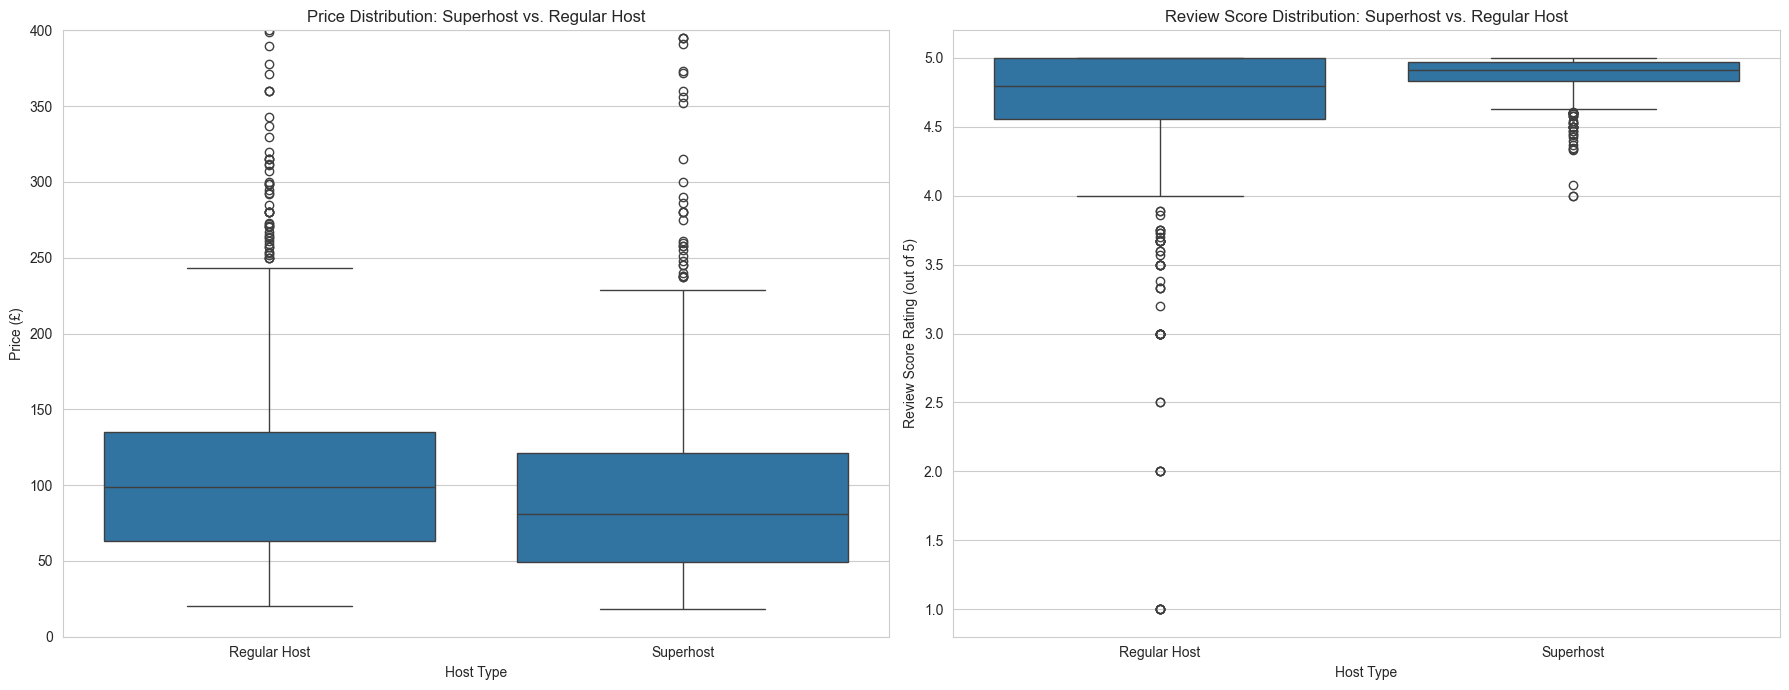


Analyzing Price by Room Type...


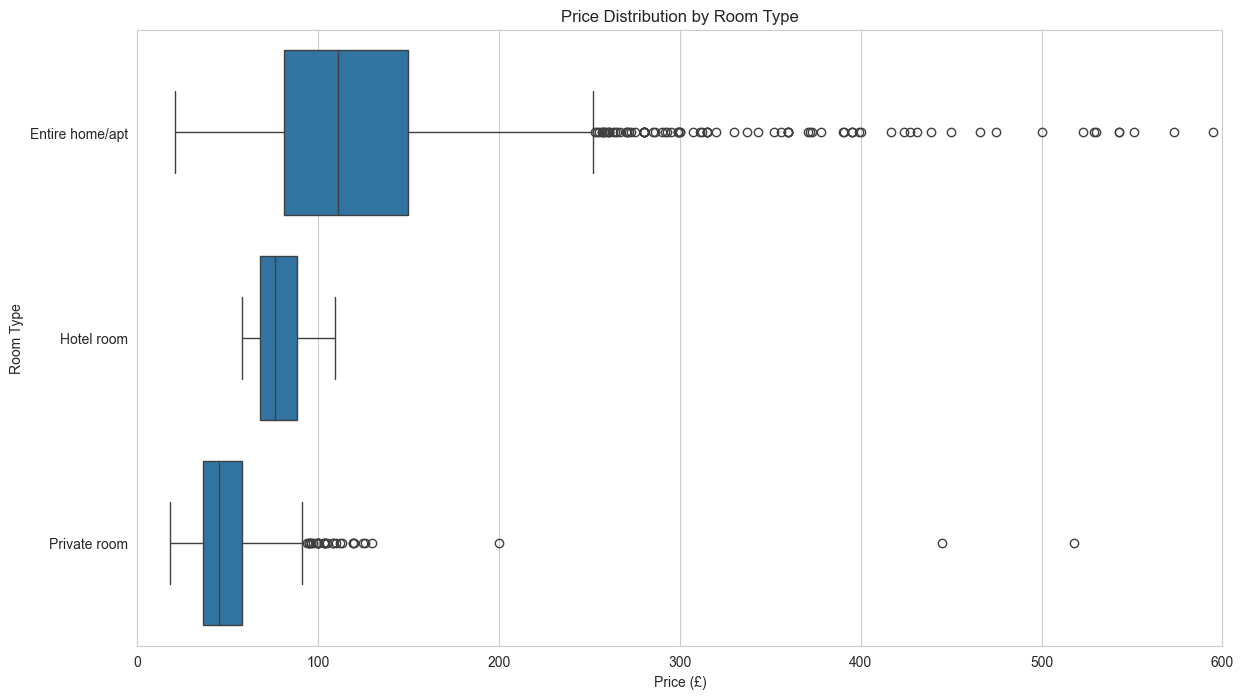


Analyzing Booking Rate Over Time...


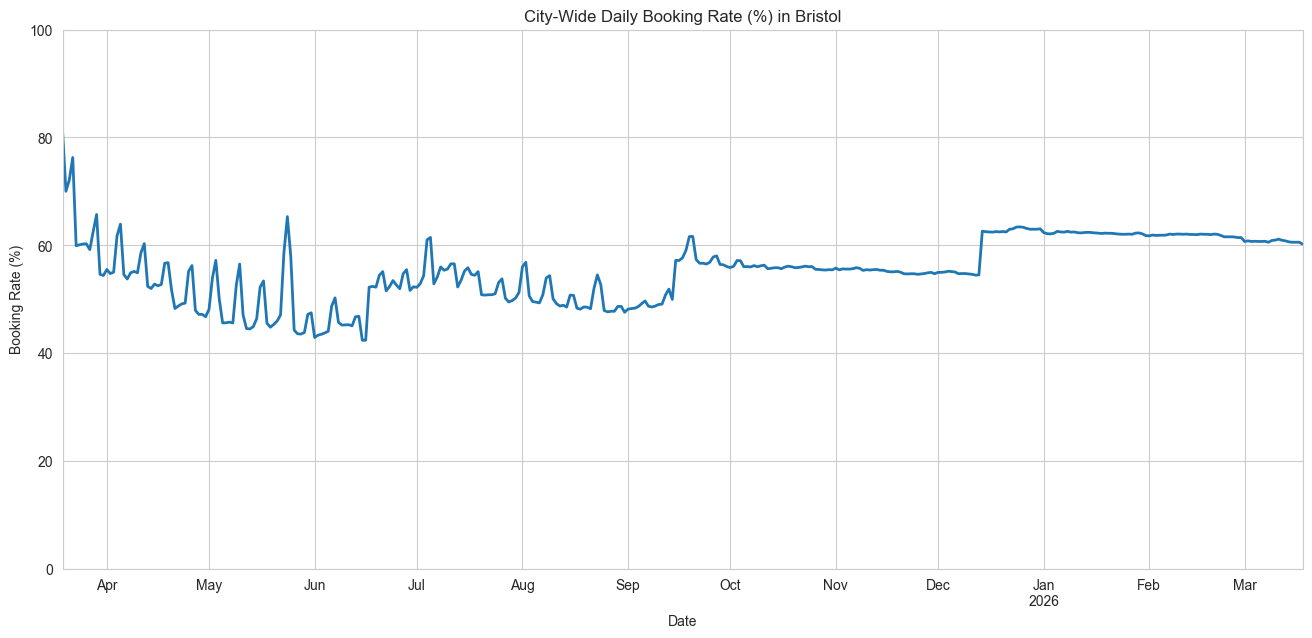


Analyzing Booking Rate by Day of Week...


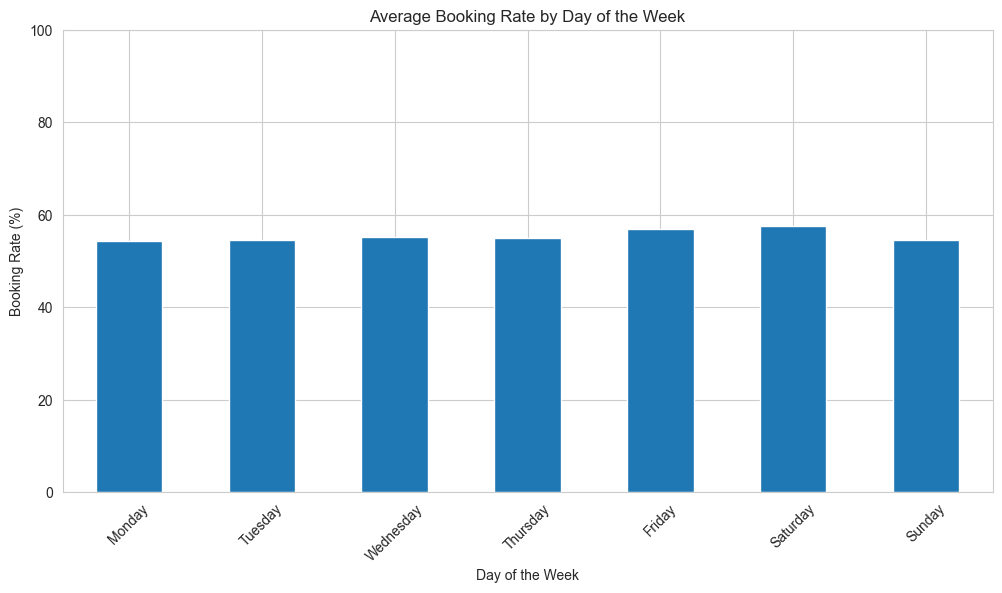


Analyzing Booking Rate by Month...


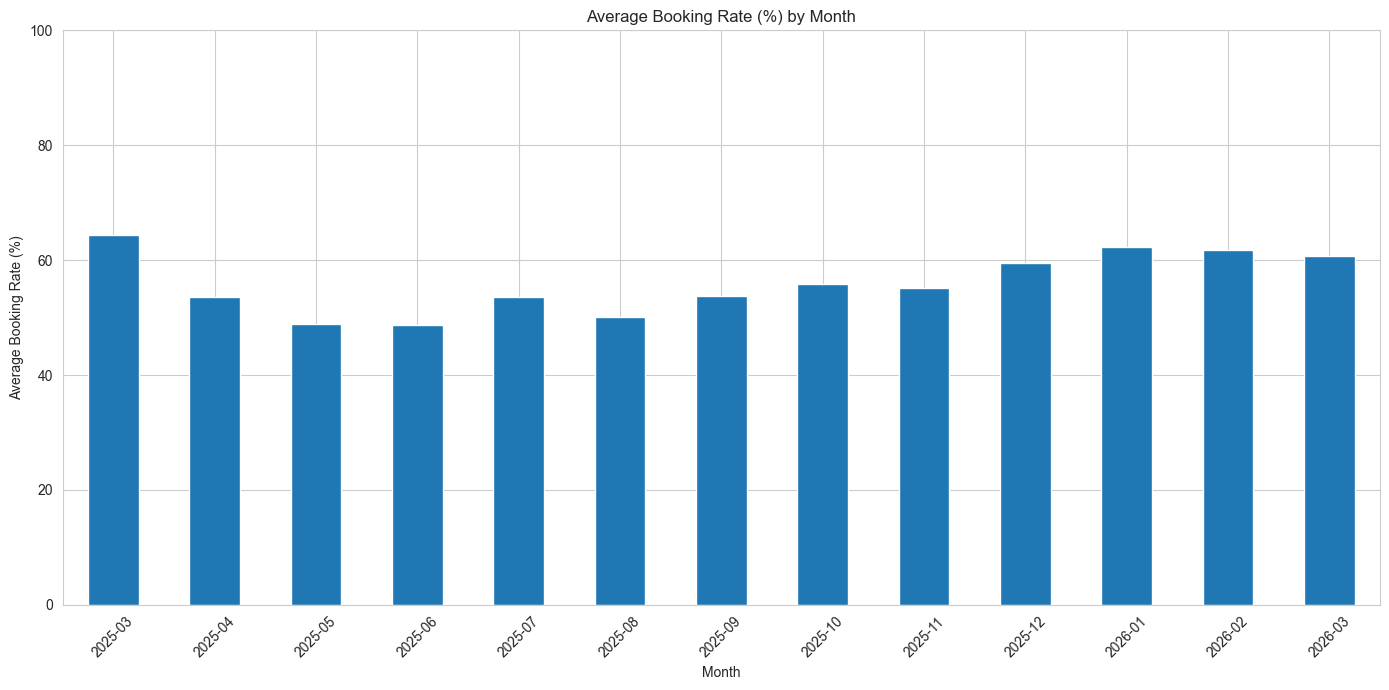


Analyzing Impact of Key Amenities on Price...


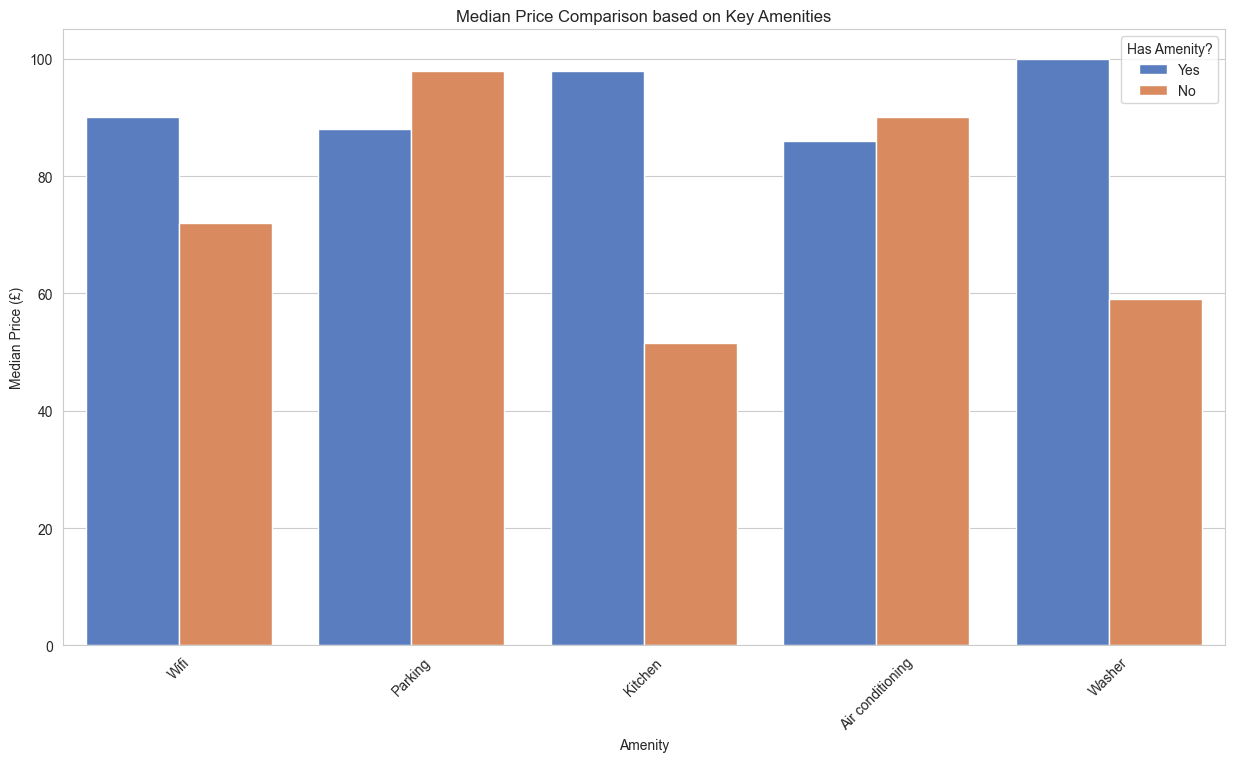


Analyzing Relationship between Review Scores and Price...


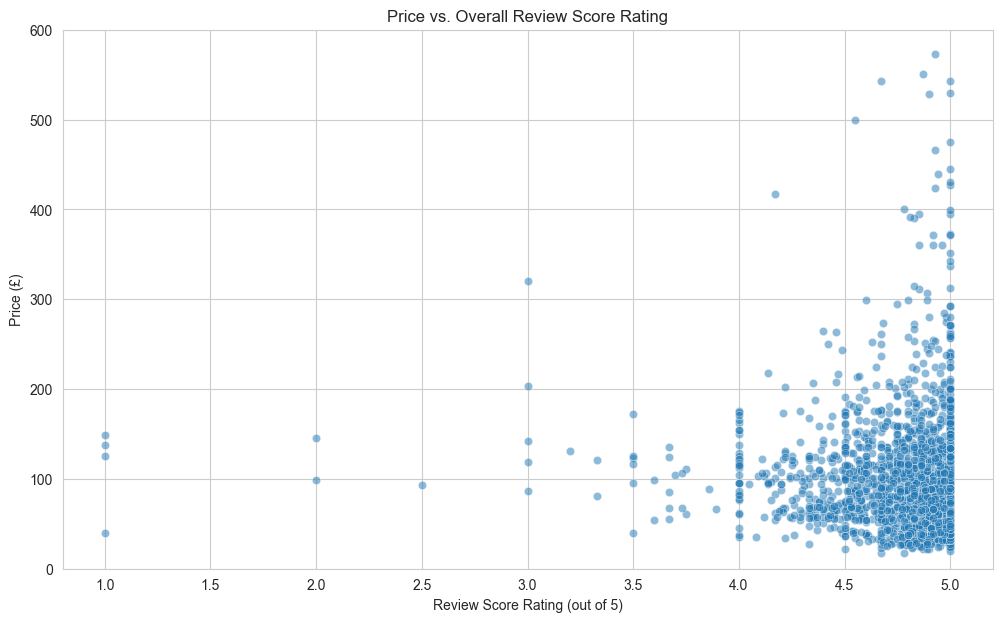


Analyzing Feature Correlations...


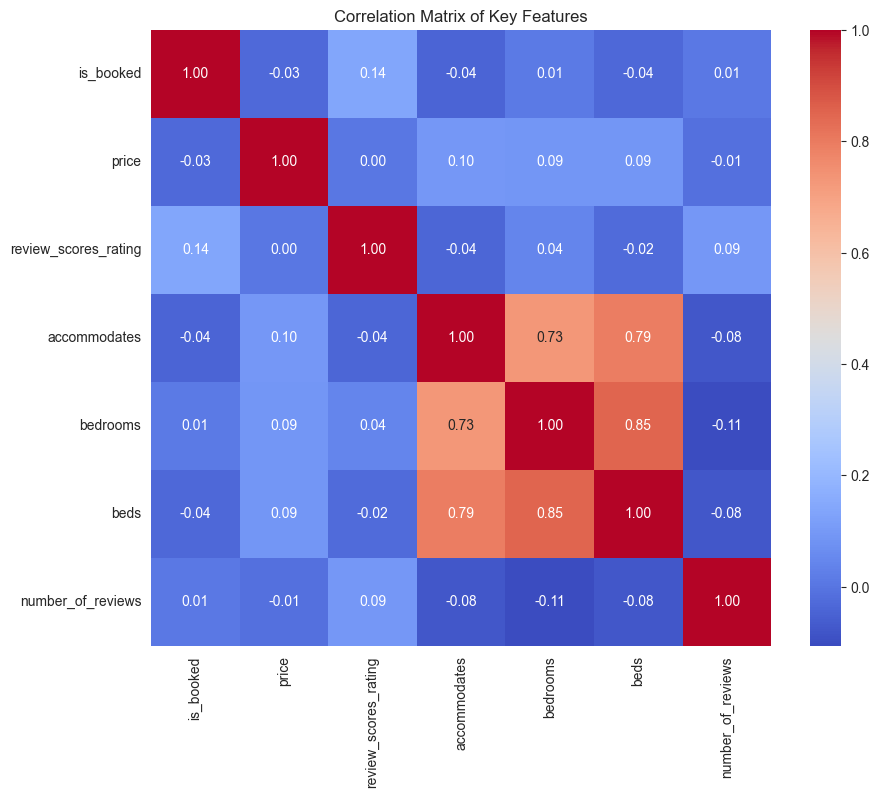


--- EDA Complete ---


In [4]:
# --- Demand by Neighbourhood ---
print("\nAnalyzing Demand by Neighbourhood...")
# Merge the datasets to get neighbourhood and booking info together
merged_df_eda = pd.merge(calendar_df[['listing_id', 'is_booked']], listings_df[['id', 'neighbourhood_cleansed']], left_on='listing_id', right_on='id')
# Get the top 10 neighbourhoods by listing count
top_10_neighbourhoods = listings_df['neighbourhood_cleansed'].value_counts().iloc[:10].index
# Filter the merged data for only these top neighbourhoods
top_10_data = merged_df_eda[merged_df_eda['neighbourhood_cleansed'].isin(top_10_neighbourhoods)]
# Calculate the average booking rate
demand_by_neighbourhood = top_10_data.groupby('neighbourhood_cleansed')['is_booked'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=demand_by_neighbourhood.values, y=demand_by_neighbourhood.index, palette='viridis')
plt.title('Average Booking Rate (%) for Top 10 Neighbourhoods')
plt.xlabel('Average Booking Rate (%)')
plt.ylabel('Neighbourhood')
plt.xlim(0, 100)
plt.show()


# --- Superhost Performance Analysis ---
print("\nAnalyzing Superhost Performance...")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
# Compare price
sns.boxplot(ax=axes[0], x='host_is_superhost', y='price', data=listings_df)
axes[0].set_title('Price Distribution: Superhost vs. Regular Host')
axes[0].set_xlabel('Host Type')
axes[0].set_ylabel('Price (£)')
axes[0].set_ylim(0, 400) # Limit for readability

# Compare review scores
sns.boxplot(ax=axes[1], x='host_is_superhost', y='review_scores_rating', data=listings_df)
axes[1].set_title('Review Score Distribution: Superhost vs. Regular Host')
axes[1].set_xlabel('Host Type')
axes[1].set_ylabel('Review Score Rating (out of 5)')
plt.tight_layout()
plt.show()


# --- Price Distribution by Room Type ---
print("\nAnalyzing Price by Room Type...")
plt.figure(figsize=(14, 8))
sns.boxplot(x='price', y='room_type', data=listings_df, order=listings_df.groupby('room_type')['price'].median().sort_values(ascending=False).index)
plt.title('Price Distribution by Room Type')
plt.xlabel('Price (£)')
plt.ylabel('Room Type')
plt.xlim(0, 600) # Limiting x-axis for better readability
plt.show()


# --- Daily Booking Rate Over Time ---
print("\nAnalyzing Booking Rate Over Time...")
daily_booking_rate = calendar_df.groupby('date')['is_booked'].mean() * 100
plt.figure(figsize=(16, 7))
daily_booking_rate.plot(linewidth=2)
plt.title('City-Wide Daily Booking Rate (%) in Bristol')
plt.xlabel('Date')
plt.ylabel('Booking Rate (%)')
plt.ylim(0, 100)
plt.show()

# --- Booking Rate by Day of the Week ---
print("\nAnalyzing Booking Rate by Day of Week...")
calendar_df['day_of_week'] = calendar_df['date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
booking_rate_by_day = calendar_df.groupby('day_of_week')['is_booked'].mean().reindex(weekday_order) * 100
plt.figure(figsize=(12, 6))
booking_rate_by_day.plot(kind='bar', rot=45)
plt.title('Average Booking Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Booking Rate (%)')
plt.ylim(0, 100)
plt.show()


# --- Booking Rate by Month ---
print("\nAnalyzing Booking Rate by Month...")
calendar_df['year_month'] = calendar_df['date'].dt.to_period('M')
monthly_booking_rate = calendar_df.groupby('year_month')['is_booked'].mean().sort_index() * 100
plt.figure(figsize=(14, 7))
monthly_booking_rate.plot(kind='bar', rot=45)
plt.title('Average Booking Rate (%) by Month')
plt.xlabel('Month')
plt.ylabel('Average Booking Rate (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


# --- Impact of Key Amenities on Price ---
print("\nAnalyzing Impact of Key Amenities on Price...")
# Define a list of key amenities to check for
key_amenities = ['Wifi', 'Parking', 'Kitchen', 'Air conditioning', 'Washer']
# Create boolean columns for each key amenity
for amenity in key_amenities:
    listings_df[f'has_{amenity.lower().replace(" ", "_")}'] = listings_df['amenities'].str.contains(amenity, case=False)
# Create a long-form DataFrame for easy plotting
amenity_price_data = []
for amenity in key_amenities:
    feature_name = f'has_{amenity.lower().replace(" ", "_")}'
    price_with = listings_df[listings_df[feature_name] == True]['price'].median()
    price_without = listings_df[listings_df[feature_name] == False]['price'].median()
    amenity_price_data.append({'Amenity': amenity, 'Has Amenity': 'Yes', 'Median Price': price_with})
    amenity_price_data.append({'Amenity': amenity, 'Has Amenity': 'No', 'Median Price': price_without})
amenity_df = pd.DataFrame(amenity_price_data)
plt.figure(figsize=(15, 8))
sns.barplot(x='Amenity', y='Median Price', hue='Has Amenity', data=amenity_df, palette='muted')
plt.title('Median Price Comparison based on Key Amenities')
plt.xlabel('Amenity')
plt.ylabel('Median Price (£)')
plt.xticks(rotation=45)
plt.legend(title='Has Amenity?')
plt.show()


# --- Review Scores vs. Price ---
print("\nAnalyzing Relationship between Review Scores and Price...")
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x='review_scores_rating',
    y='price',
    data=listings_df,
    alpha=0.5
)
plt.title('Price vs. Overall Review Score Rating')
plt.xlabel('Review Score Rating (out of 5)')
plt.ylabel('Price (£)')
plt.ylim(0, 600) # Limit y-axis to remove extreme outliers for better visualization
plt.show()


# --- Correlation Heatmap of Key Numerical Features ---
print("\nAnalyzing Feature Correlations...")
# We need to merge the datasets to do a full correlation analysis
merged_df = pd.merge(calendar_df, listings_df, left_on='listing_id', right_on='id')
corr_cols = [
    'is_booked', 'price_y', 'review_scores_rating', 'accommodates',
    'bedrooms', 'beds', 'number_of_reviews'
]
corr_matrix = merged_df[corr_cols].rename(columns={'price_y': 'price'}).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Features')
plt.show()

print("\n--- EDA Complete ---")


listings.csv loaded successfully.

Analyzing Host Types (Listings per Host)...


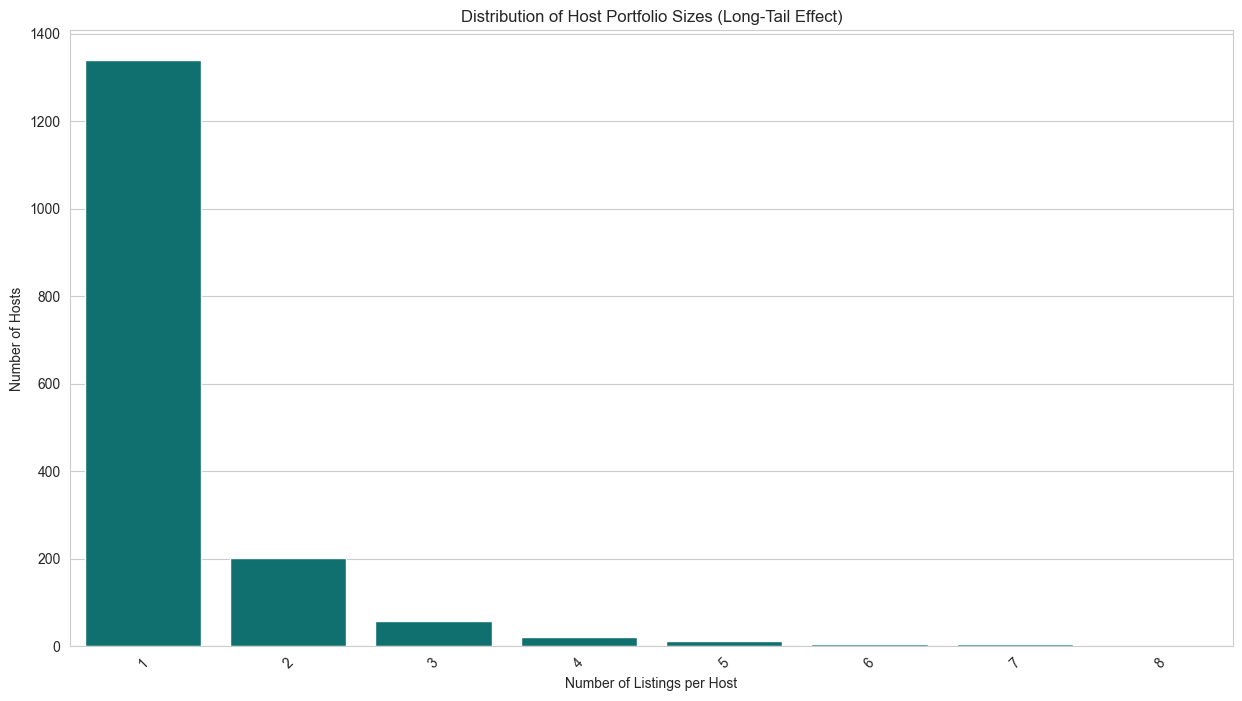


Number of hosts with only 1 listing: 1341
Number of hosts with more than 5 listings: 36


In [ ]:
# =============================================================================
# EDA - Analysis of Host Types (Listings per Host)
# =============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

# Load the listings dataset
try:
    listings_df = pd.read_csv('listings.csv')
    print('listings.csv loaded successfully.')
except FileNotFoundError:
    print('Error: listings.csv not found.')
    exit()

# --- Analysis of Host Types ---
print("\nAnalyzing Host Types (Listings per Host)...")

# Calculate the number of listings for each unique host
host_counts = listings_df['host_id'].value_counts()

portfolio_sizes = host_counts.value_counts().sort_index()

portfolio_sizes_to_plot = portfolio_sizes[portfolio_sizes.index <= 8]

# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=portfolio_sizes_to_plot.index, y=portfolio_sizes_to_plot.values, color='teal')
plt.title('Distribution of Host Portfolio Sizes (Long-Tail Effect)')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Number of Hosts')
plt.xticks(rotation=45)
plt.show()


# Print summary statistics to accompany the plot
# This logic remains correct.
num_single_listing_hosts = (host_counts == 1).sum()
num_multi_listing_hosts = (host_counts > 5).sum()

print(f"\nNumber of hosts with only 1 listing: {num_single_listing_hosts}")
print(f"Number of hosts with more than 5 listings: {num_multi_listing_hosts}")